### What is softmax ?

1. It receives logits  -> z1, z2, z3

2. then in returns- > p1,p2,p3 A probability for each class

3. Very natural for multiclass classification problems


In [7]:
import numpy as np

probabilities_from_softmax = np.array([0.2,0.5,0.8])

true_labels = np.array([0,1,1])

cross_entropy = - np.sum(np.multiply(np.log(probabilities_from_softmax) ,true_labels ))

print(f"{cross_entropy:.2f}")


0.92


### Implementing MLPs with keras

#### Note
Keras used to support multiple backends, including TensorFlow, PlaidML, Theano, and
Microsoft Cognitive Toolkit (CNTK) (the last two are sadly deprecated), but since version
2.4, Keras is TensorFlow-only. Similarly, TensorFlow used to include multiple high-level
APIs, but Keras was officially chosen as its preferred high-level API when TensorFlow 2
came out. Installing TensorFlow will automatically install Keras as well, and Keras will
not work without TensorFlow installed. In short, Keras and TensorFlow fell in love and
got married. Other popular deep learning libraries include PyTorch by Facebook and JAX



#### Building an Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras #type:ignore
fashion_minst = keras.datasets.fashion_mnist.load_data() #type:ignore

In [33]:
(X_train_full,y_train_full), (X_test,y_test) = fashion_minst
X_train ,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:], y_train_full[-5000:]


X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test  = X_test / 255.0


In [16]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


### Note

For example X_train is   (55000, 28, 28) shape

Which means 55000 images (training instances) 

Each image is 28x28 pixel

For one image we have  [28,28] array where each element stores grayscale score of an individual pixel

## Now lets build our model with keras Sequential API

In [34]:
tf.random.set_seed(42) 
model = keras.Sequential()
model.add(keras.layers.Input(shape=[28, 28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [19]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
print(model.layers[0])
print(model.layers[1])
print(model.layers[2])

<Flatten name=flatten, built=True>
<Dense name=dense, built=True>
<Dense name=dense_1, built=True>


In [26]:
layer1 = model.layers[1]
weights,biases =layer1.get_weights()

print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer ="sgd",
              metrics=["accuracy"])

In [37]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7603 - loss: 0.7229 - val_accuracy: 0.8292 - val_loss: 0.5038
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8306 - loss: 0.4873 - val_accuracy: 0.8366 - val_loss: 0.4526
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8473 - loss: 0.4405 - val_accuracy: 0.8454 - val_loss: 0.4306
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8557 - loss: 0.4127 - val_accuracy: 0.8500 - val_loss: 0.4160
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8620 - loss: 0.3926 - val_accuracy: 0.8548 - val_loss: 0.4052
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8673 - loss: 0.3767 - val_accuracy: 0.8574 - val_loss: 0.3927
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8721 - loss: 0.3632 - val_accuracy: 0.8594 - val_loss: 0.3845
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3516 - 

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

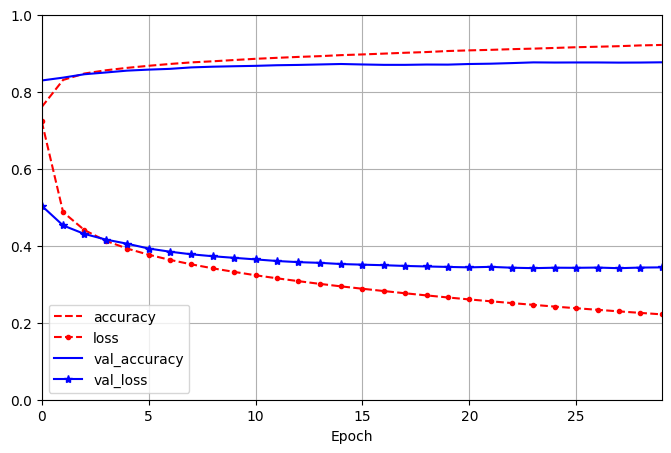

In [38]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

### Note
In this particular case, the model looks like it
performed better on the validation set than on the training set at the beginning
of training, but that’s not actually the case

The same phenomenon with a simpler example

Imagine 3 numbers: [3, 2, 1] as training losses for 3 batches.

Running average after each batch: [3, 2.5, 2]

Validation loss at the end of the epoch: average of all 3 → 2

If you plot:

First two points of training (3 and 2.5) look higher than validation (2) → seems validation is “better” at the start.

After the last batch, training average matches validation exactly.

Takeaway: comparing partial average (training) vs full average (validation) makes early points look worse than validation, even though nothing is actually better.

In [40]:
print("Model's performance on validation", model.evaluate(X_valid, y_valid))

print("Model's performance on test", model.evaluate(X_test, y_test))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8764 - loss: 0.3438
Model's performance on validation [0.3437814712524414, 0.8763999938964844]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8746 - loss: 0.3602
Model's performance on test [0.3601704239845276, 0.8745999932289124]


### Making  predictions

In [44]:
instances_to_predict = X_test[:3]

results_proba = model.predict(instances_to_predict)


print(type(results_proba))
print(results_proba.shape)

print("The model gives us 10 probabilities for each instance")
print(results_proba.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
(3, 10)
The model gives us 10 probabilities for each instance
[[0.   0.   0.   0.   0.   0.18 0.   0.01 0.   0.8 ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [ ]:
y_pred = results_proba.argmax(axis=1)
print(y_pred)

[9 2 1]


In [49]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [51]:
for i in range(0,3):
    print(class_names[y_pred[i]])

Ankle boot
Pullover
Trouser


### Building a Regression MLP Using the Sequential API (Using wide and deep neural network)

#### What is Wide and Deep Neural Network ?

![Wide & Deep Architecture](wide_deep_neural_network.png)


# Wide & Deep Learning Example: Movie Recommendation

**Scenario:**  
We want to predict whether a user will like a movie (binary: like = 1, dislike = 0).

**Available features:**
- `user_id` (categorical)
- `movie_id` (categorical)
- `user_age_group` (categorical: 18–25, 26–35, etc.)
- `movie_genre` (categorical: Action, Comedy, etc.)
- `movie_rating` (numeric: 0–5)

## Step 1: Wide Part (Memorization)
We use features and some cross-features that capture explicit patterns:
- `user_id`
- `movie_id`
- `user_age_group × movie_genre` (cross-feature capturing patterns like “18–25 users like Action movies”)

**Model:** Linear regression / logistic regression

The wide model can learn rules like:
- “User 123 likes movie 456” → high probability
- “18–25 users like Action” → increases probability

## Step 2: Deep Part (Generalization)
We embed categorical features and normalize numeric ones:

$$
\begin{align*}
\text{user\_id} &\rightarrow \text{embedding(8)} \\
\text{movie\_id} &\rightarrow \text{embedding(8)} \\
\text{user\_age\_group} &\rightarrow \text{embedding(3)} \\
\text{movie\_genre} &\rightarrow \text{embedding(3)} \\
\text{movie\_rating} &\rightarrow \text{normalized float}
\end{align*}
$$

These embeddings are concatenated and passed through a neural network with two hidden layers:

$$
[\text{Concatenated Embeddings + rating}] \rightarrow \text{Dense(32)} \rightarrow \text{ReLU} \rightarrow \text{Dense(16)} \rightarrow \text{ReLU} \rightarrow \text{Output}
$$

The deep part can learn hidden patterns, for example:
- Users who like Sci-Fi and Action might like Adventure, even if we never explicitly encoded that.

It generalizes to unseen combinations.

## Step 3: Combine Wide & Deep
The outputs of the wide linear model and the deep neural network are combined (usually summed) and passed through a sigmoid to get the final probability:

$$
\text{Final probability} = \sigma(\text{Wide\_output} + \text{Deep\_output})
$$

where $\sigma$ is the sigmoid function.

## Implementation in Keras with california_housing dataset



In [2]:
from tensorflow.keras.datasets import california_housing # pyright: ignore[reportMissingImports]

In [3]:
dataset = california_housing.load_data()
# Unpack training and test sets separately
X_train_full, y_train_full = dataset[0]
X_test, y_test = dataset[1]

dataset

├── dataset[0] → (np[train_data], np[train_targets])

└── dataset[1] → (np[test_data], np[test_targets])

In [4]:
num_samples =X_train_full.shape[0]  # 16512
split = int(num_samples * 0.8)          # 80% for training

# Split into training and validation
X_train= X_train_full[:split]
X_valid= X_train_full[split:]

y_train = y_train_full[:split]
y_valid = y_train_full[split:]

In [5]:
tf.random.set_seed(42)
norm_layer = keras.layers.Normalization()
norm_layer.adapt(X_train)   # <-- important!

hidden_layer1 = keras.layers.Dense(30, activation='relu')
hidden_layer2 = keras.layers.Dense(30, activation='relu')
concat_layer = keras.layers.Concatenate()
output_layer = keras.layers.Dense(1)

input_ = keras.layers.Input(shape=X_train.shape[1:])
normalized = norm_layer(input_)

hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = keras.Model(inputs=[input_], outputs=[output])


In [6]:
model.compile(
    optimizer='adam',        # Adam optimizer
    loss='mse',              # Mean Squared Error for regression
    metrics=['mae']          # Mean Absolute Error (optional)
)


In [7]:
history = model.fit(
    X_train,              # input features for training
    y_train,            # target values for training
    validation_data=(X_valid, y_valid),  # optional
    epochs=100,              # number of passes over the dataset
    batch_size=32,           # number of samples per gradient update
    verbose=1            # prints training progress
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 55879053312.0000 - mae: 206458.5469 - val_loss: 56506937344.0000 - val_mae: 207269.2812
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 55159451648.0000 - mae: 204899.5156 - val_loss: 55064387584.0000 - val_mae: 204144.3281
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52815081472.0000 - mae: 199708.0312 - val_loss: 51689836544.0000 - val_mae: 196589.0625
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 48548245504.0000 - mae: 189769.4375 - val_loss: 46481670144.0000 - val_mae: 184282.8750
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42766655488.0000 - mae: 175564.2344 - val_loss: 40129224704.0000 - val_mae: 168350.0312
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 36232544256.0000 - mae: 158506.9688 - val_loss: 33380651008.0000 - val_mae: 150152.9688
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29585225728.0000 - mae: 139543.5938 - val

In [8]:
test_loss, test_mae = model.evaluate(X_test,y_test )
print("Test MAE:", test_mae)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 4577569280.0000 - mae: 48704.4648
Test MAE: 48704.46484375


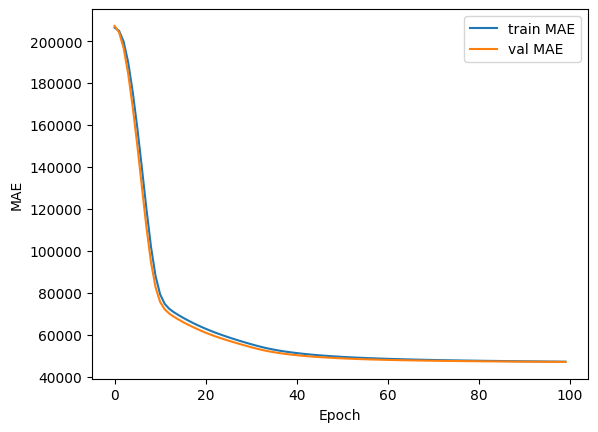

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label='train MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Neural Networks with multiple input layers

In [10]:
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])

normalization1 = keras.layers.Normalization()
normalization2 = keras.layers.Normalization()

norm_wide = normalization1(input_wide)
norm_deep = normalization2(input_deep)

hidden1 = keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)

concat_layer = keras.layers.concatenate([norm_wide,hidden2])
output_layer = keras.layers.Dense(1)(concat_layer)


model= keras.Model(inputs=[input_wide,input_deep],outputs=[output_layer])

In [11]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer,metrics= ["RootMeanSquaredError"])

In [12]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]

X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]

X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

normalization1.adapt(X_train_wide)

normalization2.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    
validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 236385.2812 - loss: 55878004736.0000 - val_RootMeanSquaredError: 237691.8906 - val_loss: 56497434624.0000
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - RootMeanSquaredError: 234746.5625 - loss: 55105945600.0000 - val_RootMeanSquaredError: 234405.0469 - val_loss: 54945726464.0000
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - RootMeanSquaredError: 229261.7812 - loss: 52560965632.0000 - val_RootMeanSquaredError: 226423.7656 - val_loss: 51267723264.0000
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - RootMeanSquaredError: 218776.6562 - loss: 47863226368.0000 - val_RootMeanSquaredError: 213256.7969 - val_loss: 45478461440.0000
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - RootMeanSquaredError: 203455.0000 - loss: 41393934336.0000 - val_RootMeanSquaredError: 195738.5312 - val_loss: 38313570304.0000
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 184766

### Visualising multiple input network

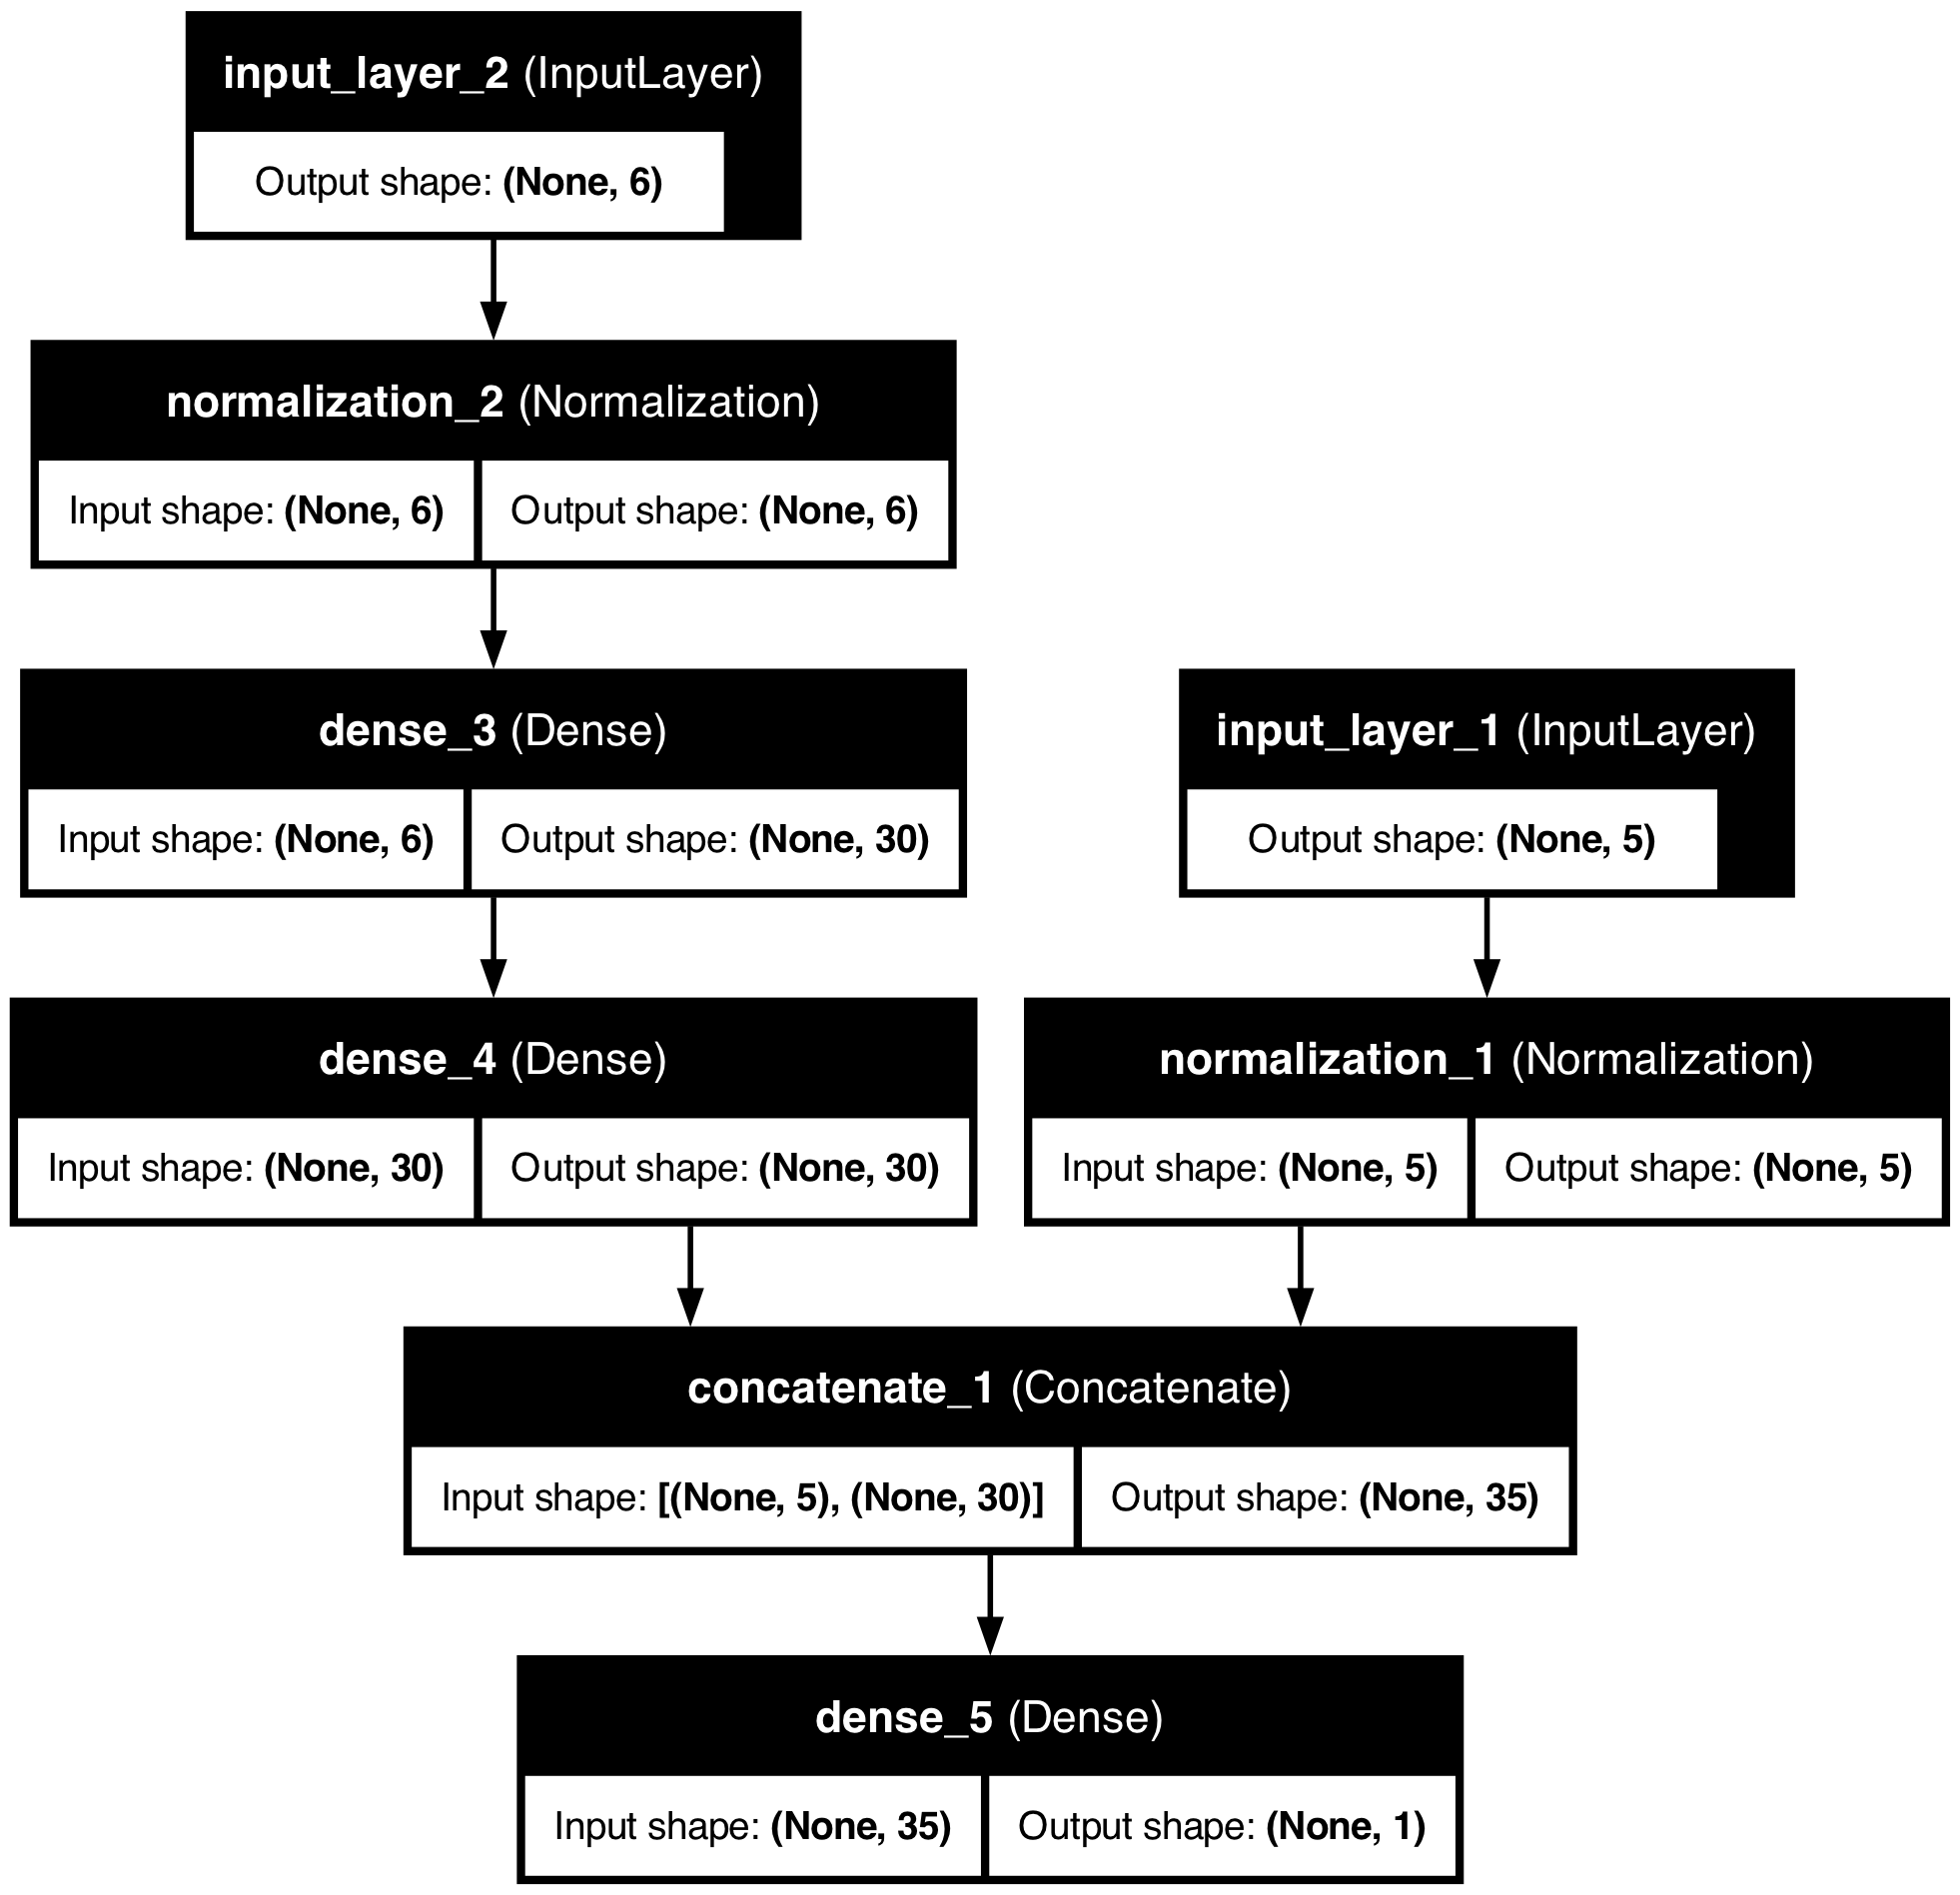

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True,)


### Using the Subclassing API to Build Dynamic Models

In [42]:
class WideandDeepModel(keras.Model):
    def __init__(self,units=30,activation='relu',**kwargs):
        super().__init__(**kwargs) #super() gives you a special object that lets you access methods from the parent (A).
        self.norm_wide = keras.layers.Normalization()
        self.norm_deep = keras.layers.Normalization()
        self.hidden1 = keras.layers.Dense(units=units,activation=activation)
        self.hidden2 = keras.layers.Dense(units=units,activation=activation)
        self.main_ouput = keras.layers.Dense(units=1)

    def call(self,inputs) :
        input_wide,input_deep = inputs
        norm_layer1 = self.norm_wide(input_wide)
        norm_layer2 = self.norm_deep(input_deep)
        hidden1 = self.hidden1(norm_layer2)
        hidden2 = self.hidden2(hidden1)
        concat_layer = keras.layers.Concatenate()([norm_layer1,hidden2])
        output_layer = self.main_ouput(concat_layer)
        return output_layer


In [25]:
model = WideandDeepModel(units=50,activation='relu')
model.norm_wide.adapt(X_train_wide)
model.norm_deep.adapt(X_train_deep)

In [ ]:
model.compile(
    optimizer =keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=[keras.metrics.RootMeanSquaredError()]
)

In [31]:


checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_checkpoints.weights.h5",  # must end with .weights.h5
    save_weights_only=True,
    save_best_only=True  # optional: only save best weights
)


In [32]:
history = model.fit(
    (X_train_wide, X_train_deep),
    y_train,
    epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
    callbacks=[checkpoint_cb]
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5613906944.0000 - root_mean_squared_error: 74926.0078 - val_loss: 5422682112.0000 - val_root_mean_squared_error: 73638.8594
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 5613223424.0000 - root_mean_squared_error: 74921.4453 - val_loss: 5421958656.0000 - val_root_mean_squared_error: 73633.9531
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 5612524032.0000 - root_mean_squared_error: 74916.7812 - val_loss: 5421272576.0000 - val_root_mean_squared_error: 73629.2891
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 5611825152.0000 - root_mean_squared_error: 74912.1172 - val_loss: 5420522496.0000 - val_root_mean_squared_error: 73624.1953
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5611097088.0000 - root_mean_squared_error: 74907.2578 - val_loss: 5419894784.0000 - val_root_mean_squared_error: 73619.9375
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 561038

### Order

1. Define the layers

2. Build the flow between the layers with call function

3. Adapt the input features to normalizers

4. Model.compile

5. Model.fit

### Save the model

In [29]:
model.save("my_model.keras")

### Hyperparameter Tuning with keras tuner

In [ ]:
import keras_tuner as kt

In [34]:


def build_wide_deep_model(hp):
    # Hyperparameters
    units1 = hp.Int("units1", min_value=16, max_value=128, step=16)
    learning_rate = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
    activation = hp.Choice("activation", values=["relu", "tanh"])

    # Build model
    model = WideandDeepModel(units=units1, activation=activation)

    # Adapt normalization layers (use training data)
    model.norm_wide.adapt(X_train_wide)
    model.norm_deep.adapt(X_train_deep)

    # Compile with chosen learning rate
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError()]
    )
    return model


In [35]:
tuner = kt.RandomSearch(
    build_wide_deep_model,
    objective="val_root_mean_squared_error",
    max_trials=5,
    executions_per_trial=1,
    directory="kt_tuning",
    project_name="wide_deep_regression"
)


In [36]:
tuner.search(
    (X_train_wide, X_train_deep),
    y_train,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
    epochs=20,
    batch_size=32
)


Trial 5 Complete [00h 00m 12s]
val_root_mean_squared_error: 237889.703125

Best val_root_mean_squared_error So Far: 73297.3671875
Total elapsed time: 00h 01m 06s


In [38]:
best_hp = tuner.get_best_hyperparameters(1)[0]

In [44]:
best_model = WideandDeepModel(
    units=best_hp.get("units1"),
    activation=best_hp.get("activation")
)

In [45]:
best_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=best_hp.get("learning_rate")),
    loss="mse",
    metrics=[keras.metrics.RootMeanSquaredError()]
)


In [46]:
mse_test = best_model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = best_model.predict((X_test_wide[:3], X_test_deep[:3]))

InaccessibleTensorError: Exception encountered when calling Normalization.call().

[1m<tf.Tensor 'normalization_2/Reshape:0' shape=(1, 5) dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.

<tf.Tensor 'normalization_2/Reshape:0' shape=(1, 5) dtype=float32> was defined here:
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/tornado/platform/asyncio.py", line 211, in start
    File "/opt/homebrew/Cellar/python@3.13/3.13.6/Frameworks/Python.framework/Versions/3.13/lib/python3.13/asyncio/base_events.py", line 683, in run_forever
    File "/opt/homebrew/Cellar/python@3.13/3.13.6/Frameworks/Python.framework/Versions/3.13/lib/python3.13/asyncio/base_events.py", line 2050, in _run_once
    File "/opt/homebrew/Cellar/python@3.13/3.13.6/Frameworks/Python.framework/Versions/3.13/lib/python3.13/asyncio/events.py", line 89, in _run
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 519, in dispatch_queue
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 508, in process_one
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 368, in execute_request
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 767, in execute_request
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 455, in do_execute
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/ipykernel/zmqshell.py", line 577, in run_cell
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3116, in run_cell
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3171, in _run_cell
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3394, in run_cell_async
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3639, in run_ast_nodes
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3699, in run_code
    File "/var/folders/h4/kdky5skx0jggltns31j4zj7r0000gn/T/ipykernel_68148/2039678755.py", line 1, in <module>
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 489, in evaluate
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 114, in one_step_on_data
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 92, in test_step
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/layers/layer.py", line 866, in __call__
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/layers/layer.py", line 1477, in _maybe_build
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/backend/tensorflow/core.py", line 240, in compute_output_spec
    File "/var/folders/h4/kdky5skx0jggltns31j4zj7r0000gn/T/ipykernel_68148/3891629339.py", line 12, in call
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/tf_data_layer.py", line 43, in __call__
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/layers/layer.py", line 866, in __call__
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/layers/layer.py", line 1468, in _maybe_build
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/layers/layer.py", line 231, in build_wrapper
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/normalization.py", line 187, in build
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/normalization.py", line 292, in finalize_state
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/ops/numpy.py", line 5282, in reshape
    File "/Users/parvizpirizade/Documents/neural_networks/venv/lib/python3.13/site-packages/keras/src/backend/tensorflow/numpy.py", line 2134, in reshape

The tensor <tf.Tensor 'normalization_2/Reshape:0' shape=(1, 5) dtype=float32> cannot be accessed from FuncGraph(name=one_step_on_data, id=6068912832), because it was defined in FuncGraph(name=scratch_graph_1, id=6068915392), which is out of scope.[0m

Arguments received by Normalization.call():
  • inputs=tf.Tensor(shape=(32, 5), dtype=float32)